## Group Name:Group 6

**Members:   
101305221 Ling Cheng,     
101170562 Yi Hu,    
101335635 Mingqian Zhou,    
101300872 Chengcheng Cheng,    
101328455 Payma Singye**

In [23]:
%matplotlib inline

from pathlib import Path

import heapq
from collections import defaultdict

import pandas as pd
import matplotlib.pylab as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

In [24]:
# Load and preprocess data set 
Catalog_df = pd.read_csv('CatalogCrossSell.csv')
Catalog_df.set_index('user', inplace=True)
Catalog_df

,Clothing Division,Housewares Division,Health Products Division,Automotive Division,Personal Electronics Division,Computers Division,Garden Division,Novelty Gift Division,Jewelry Division
user,,,,,,,,,
11569,0,1,1,1,1,0,0,1,0
13714,0,1,1,1,1,0,1,1,1
46391,0,1,1,1,1,0,1,1,1
67264,0,0,1,1,1,0,1,1,0
67363,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...
337441034,0,0,1,0,0,0,0,0,0
337498968,0,1,1,0,0,0,1,0,1
337516678,0,0,1,0,1,0,0,0,1


The database includes 4998 transactions, and there are 9 different categories. 

## 1. Association Rules 

0.033013205282112844
0.39355742296918766
1.0
0.13485394157663066
0.4673869547819128
0.0468187274909964
0.272108843537415
0.22749099639855944
0.3569427771108443


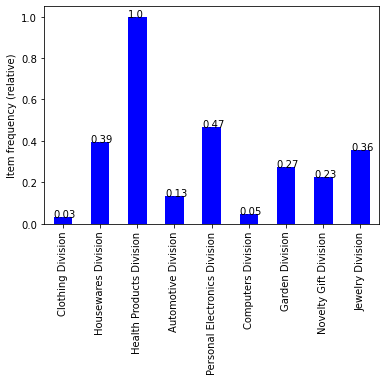

In [25]:
# determine item frequencies
itemFrequency = Catalog_df.sum(axis=0) / len(Catalog_df)

# and plot as histogram
ax = itemFrequency.plot.bar(color='blue')
plt.ylabel('Item frequency (relative)')
#plt.show()

# show label of get_height
for p in ax.patches:
    print (p.get_height())
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() , p.get_height()))

From the item frequencies, we can see that the frequencies of most catalogs are higher than 0.13, thus we can we specified a minimal support of 13% (674 transactions out of 4998 transactions) and a minimal confidence of 50%. In other words, rules based on items that were purchased together in at least 13% of the transactions. 

In [26]:
# create frequent itemsets
itemsets = apriori(Catalog_df, min_support =0.13, use_colnames=True)
itemsets.head(20)

,support,itemsets
0,0.393557,(Housewares Division)
1,1.000000,(Health Products Division)
2,0.134854,(Automotive Division)
3,0.467387,(Personal Electronics Division)
4,0.272109,(Garden Division)
5,0.227491,(Novelty Gift Division)
6,0.356943,(Jewelry Division)
7,0.393557,"(Housewares Division, Health Products Division)"
8,0.235494,"(Housewares Division, Personal Electronics Div..."
9,0.132853,"(Housewares Division, Garden Division)"


By enumeration, we can see that only the itemsets listed above have a support of at least 13%.

In [27]:
# and convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.5).head(20)
rules.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(Novelty Gift Division),(Personal Electronics Division),0.227491,0.467387,0.169068,0.743184,1.590082,0.062741,2.073908
3,(Novelty Gift Division),(Housewares Division),0.227491,0.393557,0.134854,0.592788,1.506230,0.045323,1.489255
4,(Jewelry Division),(Housewares Division),0.356943,0.393557,0.194878,0.545964,1.387254,0.054400,1.335671
10,(Garden Division),(Personal Electronics Division),0.272109,0.467387,0.163265,0.600000,1.283733,0.036085,1.331533
2,(Personal Electronics Division),(Housewares Division),0.467387,0.393557,0.235494,0.503853,1.280252,0.051551,1.222304
17,(Personal Electronics Division),"(Housewares Division, Health Products Division)",0.467387,0.393557,0.235494,0.503853,1.280252,0.051551,1.222304
16,(Housewares Division),"(Personal Electronics Division, Health Product...",0.393557,0.467387,0.235494,0.598373,1.280252,0.051551,1.326139
15,"(Personal Electronics Division, Health Product...",(Housewares Division),0.467387,0.393557,0.235494,0.503853,1.280252,0.051551,1.222304
14,"(Housewares Division, Health Products Division)",(Personal Electronics Division),0.393557,0.467387,0.235494,0.598373,1.280252,0.051551,1.326139
1,(Housewares Division),(Personal Electronics Division),0.393557,0.467387,0.235494,0.598373,1.280252,0.051551,1.326139


In [28]:
# Filter rules by number of antecedents (maximum 2) and consequents (maximum 1)
rules = rules[[len(c) <= 2 for c in rules.antecedents]]
rules = rules[[len(c) <= 1 for c in rules.consequents]]

rules.sort_values(by=['lift'], ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(Novelty Gift Division),(Personal Electronics Division),0.227491,0.467387,0.169068,0.743184,1.590082,0.062741,2.073908
3,(Novelty Gift Division),(Housewares Division),0.227491,0.393557,0.134854,0.592788,1.506230,0.045323,1.489255
4,(Jewelry Division),(Housewares Division),0.356943,0.393557,0.194878,0.545964,1.387254,0.054400,1.335671
10,(Garden Division),(Personal Electronics Division),0.272109,0.467387,0.163265,0.600000,1.283733,0.036085,1.331533
2,(Personal Electronics Division),(Housewares Division),0.467387,0.393557,0.235494,0.503853,1.280252,0.051551,1.222304
15,"(Personal Electronics Division, Health Product...",(Housewares Division),0.467387,0.393557,0.235494,0.503853,1.280252,0.051551,1.222304
14,"(Housewares Division, Health Products Division)",(Personal Electronics Division),0.393557,0.467387,0.235494,0.598373,1.280252,0.051551,1.326139
1,(Housewares Division),(Personal Electronics Division),0.393557,0.467387,0.235494,0.598373,1.280252,0.051551,1.326139
12,(Jewelry Division),(Personal Electronics Division),0.356943,0.467387,0.197479,0.553251,1.183711,0.030649,1.192198
0,(Housewares Division),(Health Products Division),0.393557,1.000000,0.393557,1.000000,1.000000,0.000000,inf


In [29]:
# Remove redundant fields
rules.sort_values(by=['lift'], ascending=False).drop(columns=
                                                         ['antecedent support', 'consequent support', 'conviction']).head(25)

,antecedents,consequents,support,confidence,lift,leverage
11,(Novelty Gift Division),(Personal Electronics Division),0.169068,0.743184,1.590082,0.062741
3,(Novelty Gift Division),(Housewares Division),0.134854,0.592788,1.506230,0.045323
4,(Jewelry Division),(Housewares Division),0.194878,0.545964,1.387254,0.054400
10,(Garden Division),(Personal Electronics Division),0.163265,0.600000,1.283733,0.036085
2,(Personal Electronics Division),(Housewares Division),0.235494,0.503853,1.280252,0.051551
15,"(Personal Electronics Division, Health Product...",(Housewares Division),0.235494,0.503853,1.280252,0.051551
14,"(Housewares Division, Health Products Division)",(Personal Electronics Division),0.235494,0.598373,1.280252,0.051551
1,(Housewares Division),(Personal Electronics Division),0.235494,0.598373,1.280252,0.051551
12,(Jewelry Division),(Personal Electronics Division),0.197479,0.553251,1.183711,0.030649
0,(Housewares Division),(Health Products Division),0.393557,1.000000,1.000000,0.000000


**Finally, we can get rules below:**


**For example, the first itemset {Novelty Gift Division, Personal Electronics Division} has a support of 0.169 (equivalent to percentage support of 16.9%) because there are 845 transactions included Novelty Gift Division and Personal Electronics Division. The confidence is 0.743184 and the lift is 1.590082.**

**Therefore, we can conduct the rules:
If 'Novelty Gift Division' is purchased, then with confidence 74.3% 'Personal Electronics Division' will also be purchased. This rule has a lift ratio of 1.59.
The confidence tells us at 74.3% confidence consequents will be found, and is useful in determining the business or operational usefulness of a rule. And the lift ratio> 1, which indicates that this rule more useful in finding consequent item sets than just selecting transactions randomly.**


## 2. Collaborative Filtering 

In [30]:
import pandas as pd
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

In [31]:
data = pd.read_csv('CatalogCrossSell.csv')

# Create a new dataframe without the user ids.
data_items = data.drop('user', 1)

**Item based**

In [32]:
# As a first step we normalize the user vectors to unit vectors.

# magnitude = sqrt(x2 + y2 + z2 + ...)
magnitude = np.sqrt(np.square(data_items).sum(axis=1))

# unitvector = (x / magnitude, y / magnitude, z / magnitude, ...)
data_items = data_items.divide(magnitude, axis='index')

def calculate_similarity(data_items):
    """Calculate the column-wise cosine similarity for a sparse
    matrix. Return a new dataframe matrix with similarities.
    """
    data_sparse = sparse.csr_matrix(data_items)
    # print(data_sparse)
    similarities = cosine_similarity(data_sparse.transpose())
    # print(similarities)
    sim = pd.DataFrame(data=similarities, index= data_items.columns, columns= data_items.columns)
    return sim

# Build the similarity matrix
data_matrix = calculate_similarity(data_items)

In [33]:
data_matrix

,Clothing Division,Housewares Division,Health Products Division,Automotive Division,Personal Electronics Division,Computers Division,Garden Division,Novelty Gift Division,Jewelry Division
Clothing Division,1.000000,0.162876,0.125164,0.065058,0.112407,0.135037,0.079265,0.107781,0.135090
Housewares Division,0.162876,1.000000,0.483711,0.208672,0.424484,0.182323,0.294871,0.347975,0.404081
Health Products Division,0.125164,0.483711,1.000000,0.257938,0.542185,0.152787,0.388693,0.338555,0.461621
Automotive Division,0.065058,0.208672,0.257938,1.000000,0.237670,0.086668,0.358368,0.235146,0.256417
Personal Electronics Division,0.112407,0.424484,0.542185,0.237670,1.000000,0.109310,0.340563,0.413768,0.360996
Computers Division,0.135037,0.182323,0.152787,0.086668,0.109310,1.000000,0.104770,0.093314,0.179078
Garden Division,0.079265,0.294871,0.388693,0.358368,0.340563,0.104770,1.000000,0.347959,0.298707
Novelty Gift Division,0.107781,0.347975,0.338555,0.235146,0.413768,0.093314,0.347959,1.000000,0.272786
Jewelry Division,0.135090,0.404081,0.461621,0.256417,0.360996,0.179078,0.298707,0.272786,1.000000


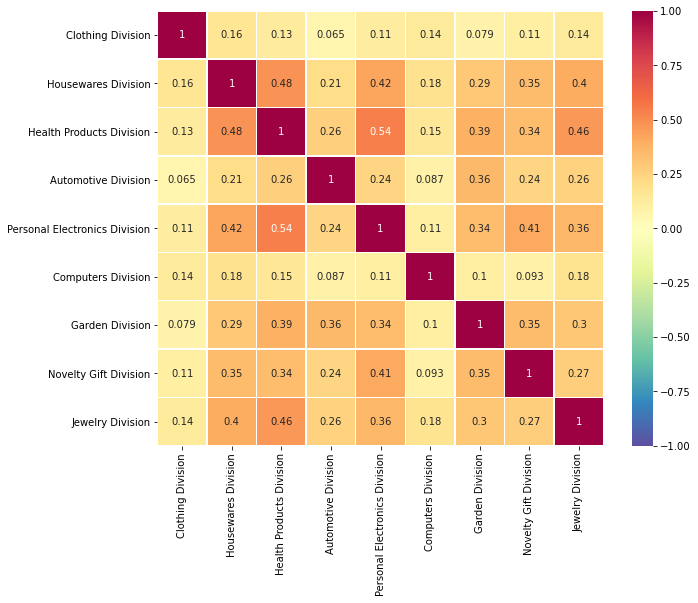

In [34]:
#heatmap using seaborn

import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.heatmap(data_matrix, annot=True, linewidth = 0.5, cmap='Spectral_r',square=False, vmin = -1, vmax = 1)

In [35]:
# Lets get the top 3 similar catogories for Novelty Gift Division
data_matrix.loc['Novelty Gift Division'].nlargest(4)

Novelty Gift Division            1.000000
Personal Electronics Division    0.413768
Housewares Division              0.347975
Garden Division                  0.347959
Name: Novelty Gift Division, dtype: float64

**In this case, the other 3 most similar items to Novelty Gift Division are Personal Electronics Division, Housewares Division, Garden Division. Therefore, we can recommend Personal Electronics Division, Housewares Division, Garden Division to the customer who has bought Novelty Gift Division.**

**User based**

In [36]:
# Construct a new dataframe with the 10 closest neighbours (most similar) for each customer.
data_neighbours = pd.DataFrame(index=data_matrix.columns, columns=range(1,10))
for i in range(0, len(data_matrix.columns)):
    data_neighbours.iloc[i,:9] = data_matrix.iloc[0:,i].sort_values(ascending=False)[:9].index

In [37]:
user = 337516678 # The id of the user for whom we want to generate recommendations
user_index = data[data.user == user].index.tolist()[0]

# Get the catogories the user has bought.
known_user_buys = data_items.iloc[user_index]
known_user_buys = known_user_buys[known_user_buys >0].index.values

In [38]:
known_user_buys

array(['Health Products Division', 'Personal Electronics Division',
       'Jewelry Division'], dtype=object)

In [39]:
# Construct the neighborhood from the most similar items to the ones our user has already bought.
most_similar_to_buys = data_neighbours.loc[known_user_buys]

In [40]:
similar_list = most_similar_to_buys.values.tolist()
similar_list = list(set([item for sublist in similar_list for item in sublist]))
neighbourhood = data_matrix[similar_list].loc[similar_list]

# A user vector containing only the neighbourhood items and the known user has bought.
user_vector = data_items.loc[user_index].loc[similar_list]

# Calculate the score.
score = neighbourhood.dot(user_vector).div(neighbourhood.sum(axis=1))

# Drop the known buys.
score = score.drop(known_user_buys)

In [41]:
# Print the known buys.
known_user_buys

array(['Health Products Division', 'Personal Electronics Division',
       'Jewelry Division'], dtype=object)

In [42]:
# Print the top 3 recommendations.
score.nlargest(3)

Housewares Division      0.215915
Novelty Gift Division    0.187455
Garden Division          0.184706
dtype: float64

**This gives us that the known customer 337516678 has bought 3 categories, which are'Health Products Division', 'Personal Electronics Division', 'Jewelry Division'.**

**The 3 top recommended catogories are:'Housewares Division', 'Novelty Gift Division', 'Garden Division'.**